In [ ]:
## This script is used  to generate plots in the paper "Hierarchical learning of PDEs"

In [ ]:
## clear ram
# import torch
# with torch.no_grad():
#     torch.cuda.empty_cache()
# %reset

In [1]:
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle
import numpy as np
import torch
import string
import warnings
warnings.filterwarnings('ignore')
criterion = torch.nn.MSELoss(reduction='none')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
torch.cuda.is_available()

True

In [3]:
# paths
noise = 0.0 
system = 'FHN'  
data_dir = os.path.join('../data/', system)
pickle_file_path=os.path.join('../results/FHN/data')
path_fig=os.path.join('../results/FHN/figure/')

In [4]:
# test_dataALL = torch.load(data_dir + "/test_data.pt")
# T10=test_dataALL.shape[1]
# T1=int(T10/10)
# t_test=T10 #(T1+1),(T10)
# test_data=test_dataALL[:,:t_test,:]
# test_data.shape

#### Loading the result data

In [5]:
## for first plot

In [6]:
with open(pickle_file_path+"/FHNCPUtimes_1T.pickle", 'rb') as file:
    FHNCPUtimes_1T= pickle.load(file)

In [8]:
with open(pickle_file_path+"/FHNFHNtimes_error.pickle", 'rb') as file:
    CPUtimes_NNTS= pickle.load(file)
error_NNTS=CPUtimes_NNTS['error_ind']
cputime_NNTS=CPUtimes_NNTS['cpu_times']
NNTS0_mse=error_NNTS[0].mean(0)[1:].mean().cpu().detach().numpy()
hits_time=FHNCPUtimes_1T['hits_time']
lstm_time=FHNCPUtimes_1T['lstm_time']
rc_time=FHNCPUtimes_1T['rc_time']
sindy_time=FHNCPUtimes_1T['sindy_time']
NNTS0_time=cputime_NNTS[0]

In [9]:
with open(pickle_file_path+"/FHNmse_1T.pickle", 'rb') as file:
    FHNmse_1T= pickle.load(file)
aehits_mse=FHNmse_1T['aehits_mse'].mean().cpu().detach().numpy()
aelstm_mse=FHNmse_1T['aelstm_mse'].mean().cpu().detach().numpy()
aeRC_mse=FHNmse_1T['aeRC_mse'].mean().cpu().detach().numpy()
aesindy_mse=FHNmse_1T['aesindy_mse'].mean().cpu().detach().numpy()

In [10]:
### for second plot

In [11]:
mse_latent=loadmat(pickle_file_path+"/FHNmse_latent.mat") # mse_latent for FHN
AE_loss=mse_latent['AE_loss']
AE_loss=AE_loss.reshape(AE_loss.shape[1])
PCA_loss=mse_latent['PCA_loss']
PCA_loss=PCA_loss.reshape(PCA_loss.shape[1])

In [12]:
# for third plot

In [13]:
with open(pickle_file_path+"/FHNresults_1T.pickle", 'rb') as file:
    FHNresults_1T = pickle.load(file)
# with open(pickle_file_path+"/KSresults_KS_1T.pickle", 'rb') as file:
#     FHNresults_1T = pickle.load(file)


In [14]:
### FOR 1 T
test_dataT1=FHNresults_1T['test_data']#.cpu().detach().numpy()
test_data=test_dataT1
encoded=FHNresults_1T['encoded'].cpu().detach().numpy()
z_hits=FHNresults_1T['z_hits'].cpu().detach().numpy()
z_lstm=FHNresults_1T['z_lstm'].cpu().detach().numpy()
z_RC=FHNresults_1T['z_RC']
z_sindy=FHNresults_1T['z_sindy']
AEpred=FHNresults_1T['AEpred']
y_hitsT1=FHNresults_1T['y_hits'].cpu().detach().numpy()
y_hits=y_hitsT1
y_lstm=FHNresults_1T['y_lstm'].cpu().detach().numpy()
y_RC=FHNresults_1T['y_RC'].cpu().detach().numpy()
y_sindy=FHNresults_1T['y_sindy'].cpu().detach().numpy()

In [15]:
## error
latent_hits=criterion(torch.tensor(z_hits).float(), torch.tensor(encoded[:,1:,:]).float())#.mean(1)#.mean(-1)
latent_lstm=criterion(torch.tensor(z_lstm).float(), torch.tensor(encoded[:,:,:]).float())#.mean(1)#.mean(-1)
latent_RC=criterion(torch.tensor(z_RC).float(), torch.tensor(encoded[:,:,:]).float())#.mean(1)#.mean(-1)
latent_sindy=criterion(torch.tensor(z_sindy).float(), torch.tensor(encoded[:,:,:]).float())#.mean(1)#.mean(-1)

In [16]:
### 5TH PLOT

In [46]:
AE_loss.shape,PCA_loss.shape

((10,), (10,))

In [18]:
### 6th plot

#### Plotting the results

In [19]:
### First Plot

In [20]:
to_plot = dict()

# different systems
to_plot['FHN'] = dict()
to_plot['FHN']['AEHiTS time'] = [hits_time]
to_plot['FHN']['AEHiTS mse'] = [aehits_mse]
to_plot['FHN']['AELSTM time'] = [lstm_time]
to_plot['FHN']['AELSTM mse'] = [aelstm_mse]
to_plot['FHN']['AERC time'] = [rc_time]
to_plot['FHN']['AERC mse'] = [aeRC_mse]
to_plot['FHN']['AESINDy time'] = [sindy_time]
to_plot['FHN']['AESINDy mse'] = [aesindy_mse]
to_plot['FHN']['NNTS0 time'] = [NNTS0_time]
to_plot['FHN']['NNTS0 mse'] = [NNTS0_mse]

In [21]:
print(hits_time,aehits_mse,lstm_time,aelstm_mse,rc_time,aeRC_mse,sindy_time,aesindy_mse)

3.3632736206054688 0.00051346095 1.4201931953430176 0.236678 0.002185344696044922 0.41257167 10.598660945892334 0.3239002


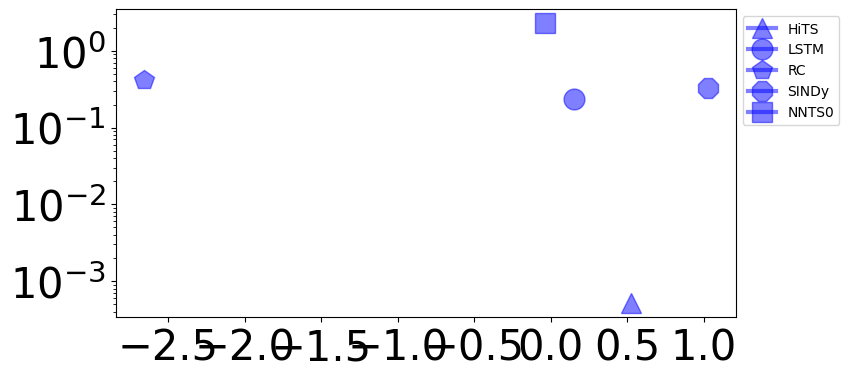

In [22]:
fig = plt.figure(figsize=(8, 4))
plt.semilogy(np.log10(to_plot['FHN']['AEHiTS time']),to_plot['FHN']['AEHiTS mse'], 'b-^', 
             np.log10(to_plot['FHN']['AELSTM time']), to_plot['FHN']['AELSTM mse'],  'b-o', 
 np.log10(to_plot['FHN']['AERC time']),to_plot['FHN']['AERC mse'], 'b-p'
    ,np.log10(to_plot['FHN']['AESINDy time']),to_plot['FHN']['AESINDy mse'] ,  'b-8'
    ,np.log10(to_plot['FHN']['NNTS0 time']),to_plot['FHN']['NNTS0 mse'] ,  'b-s',
         markersize=15, linewidth=3.0, alpha=0.5, label='FHN')
leg=['HiTS','LSTM','RC','SINDy','NNTS0']
plt.legend(leg,bbox_to_anchor=(1, 1), fontsize=10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [23]:
### Second plot

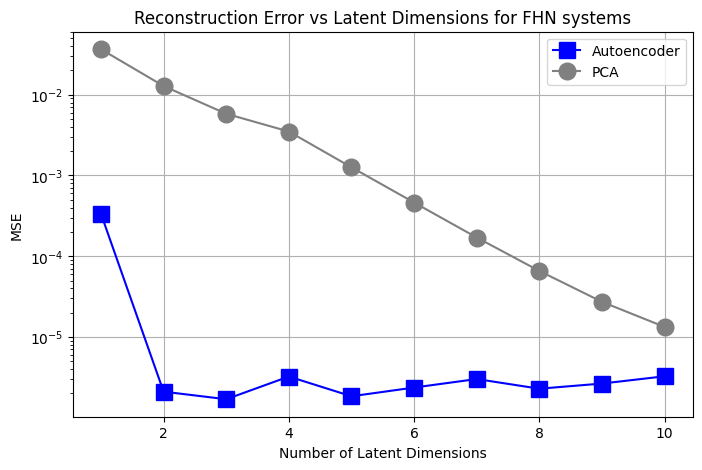

AE:  [0.0003357742098160088, 2.1036928501416696e-06, 1.695473429208505e-06, 3.2376544822909636e-06, 1.8445475689077284e-06, 2.3650757157156477e-06, 3.0146607059577946e-06, 2.2882625216880115e-06, 2.651325985425501e-06, 3.2593723062745994e-06]
PCA:  [3.6630191e-02 1.2823383e-02 5.8156722e-03 3.5029149e-03 1.2635457e-03
 4.6248650e-04 1.7058270e-04 6.5733191e-05 2.7258464e-05 1.3318565e-05]


In [25]:
latent_dims= np.arange(1,11,1)
plt.figure(figsize=(8, 5))
plt.semilogy(latent_dims, AE_loss, marker='s',markersize=12,label='Autoencoder',color='blue')
plt.semilogy(latent_dims, PCA_loss, marker='o',markersize=12,label='PCA',color='gray')
plt.title('Reconstruction Error vs Latent Dimensions for {} systems'.format(system))
plt.xlabel('Number of Latent Dimensions')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()


print('AE: ',[item.item() for item in AE_loss])
print('PCA: ',PCA_loss)


In [ ]:
#### 3rd plot

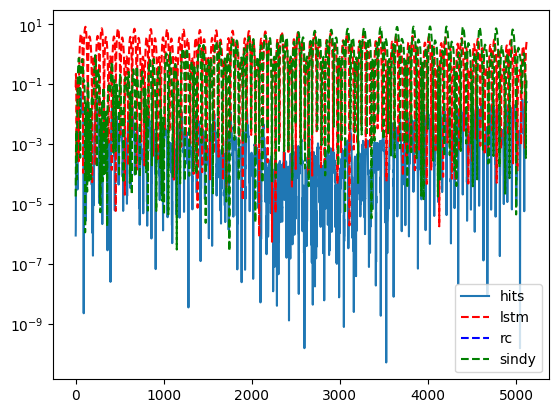

In [26]:
plt.semilogy(latent_hits[0,:,0])
plt.semilogy(latent_lstm[0,:,0],'r--')
plt.semilogy(latent_RC[0,:,0],'b--')
plt.semilogy(latent_sindy[0,1:,0],'g--')
l=['hits','lstm','rc','sindy']
plt.legend(l,loc='lower right')
plt.show()

In [141]:
encoded.shape,z_hits.shape

((1, 5121, 2), (1, 5120, 2))

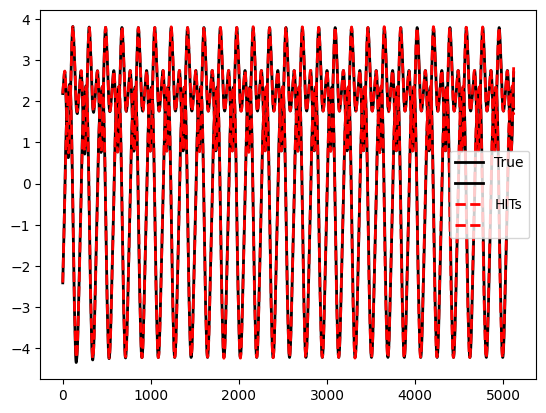

In [27]:
plt.plot(encoded[0,1:,:],'k',lw=2)
plt.plot(z_hits[0,:,:],'r--',lw=2)
L=['True',None,'HITs',None]
plt.legend(L)
plt.show()

In [39]:
# plt.semilogy(PCA_loss.T,'k*-')
# plt.semilogy(AE_loss.T,'b*-')
# plt.show()

In [52]:
# test_data=FHNresults_10T['test_data'].cpu().detach().numpy()
# test_data.shape

In [9]:
### loading variables
# test_data=FHNresults_10T['test_data'].cpu().detach().numpy()
# encoded=FHNresults_10T['encoded'].cpu().detach().numpy()
# z_hits=FHNresults_10T['z_hits'].cpu().detach().numpy()
# z_lstm=FHNresults_10T['z_lstm'].cpu().detach().numpy()
# z_RC=FHNresults_10T['z_RC']
# z_sindy=FHNresults_10T['z_sindy']
# AEpred=FHNresults_10T['AEpred']
# y_hits=FHNresults_10T['y_hits'].cpu().detach().numpy()
# y_lstm=FHNresults_10T['y_lstm'].cpu().detach().numpy()
# y_RC=FHNresults_10T['y_RC'].cpu().detach().numpy()
# y_sindy=FHNresults_10T['y_sindy'].cpu().detach().numpy()

In [10]:
z_hits.shape,encoded.shape

((5, 5120, 8), (5, 5121, 8))

In [12]:
latent_lstm.shape,latent_hits.shape,latent_RC.shape

(torch.Size([5]), torch.Size([5]), torch.Size([5]))

In [13]:
# latent_hits.shape
# latent=torch.unsqueeze(latent_hits, 0)
# latent.shape

In [14]:
time=torch.linspace(1, 51, steps=5120)
# time=torch.unsqueeze(time, 0)
# time.shape

In [31]:
### PLOTING THE ERRORS
plt.semilogy(latent_lstm,'*-',label='lstm')
plt.semilogy(latent_sindy,'*-',label='SINDY')
plt.semilogy(latent_RC,'*-',label='RC')
plt.semilogy(latent_hits,'*-',label='HITS')
plt.legend(loc=5)
plt.show()

In [36]:
test_dataT1.shape

(1, 5121, 202)

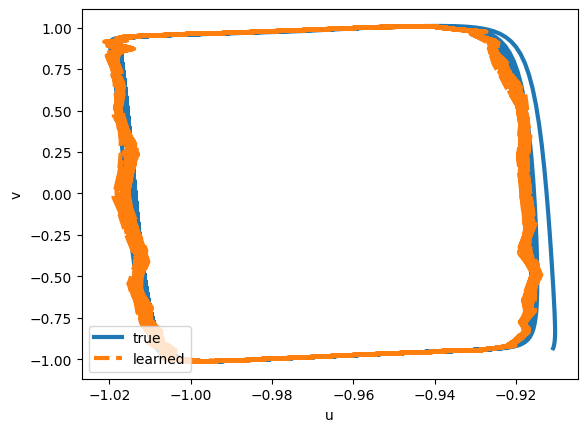

In [39]:
# ## PLOTTING THE OUTPUT
test_dataT1=FHNresults_1T['test_data']
y_hitsT1=FHNresults_1T['y_hits'].cpu().detach().numpy()
d=50
idx=0
T=5000
y1_true=test_dataT1[idx,1:,0]
y1_aehits=y_hitsT1[idx,:,0]
y2_true=test_dataT1[idx,1:,d]
y2_aehits=y_hitsT1[idx,:,d]
plt.plot(y1_true, y2_true, linewidth=3,label='true')
plt.plot(y1_aehits, y2_aehits, '--',linewidth=3, label='learned')
plt.legend(loc='lower left')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

In [18]:
# train_data = torch.load(data_dir + "/train_data.pt")
# U, S1, Vh = torch.linalg.svd(train_data[0,:,:])

In [19]:
# train_data.shape

In [20]:
# plt.semilogy(S1[1:15].cpu().detach().numpy(),'o',lw=6)
# # plt.semilogy(S2[:16].cpu().detach().numpy(),'+',lw=2)
# plt.semilogy(mse_latent.T,'*',lw=6)
# plt.legend(['PCA','AE'])
# Xt = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
# labels=['2','3','4','5','6','7','8','9','10','11','12','13','14','15']
# plt.xticks(Xt,labels)
# plt.xlabel('Latent dimension')
# plt.ylabel('log (mse)')
# plt.grid()
# plt.show()

In [40]:
y1_true=test_dataT1[idx,1:,:d]
y1_aehits=y_hitsT1[idx,:,:d]
y2_true=test_dataT1[idx,1:,d:]
y2_aehits=y_hitsT1[idx,:,d:]

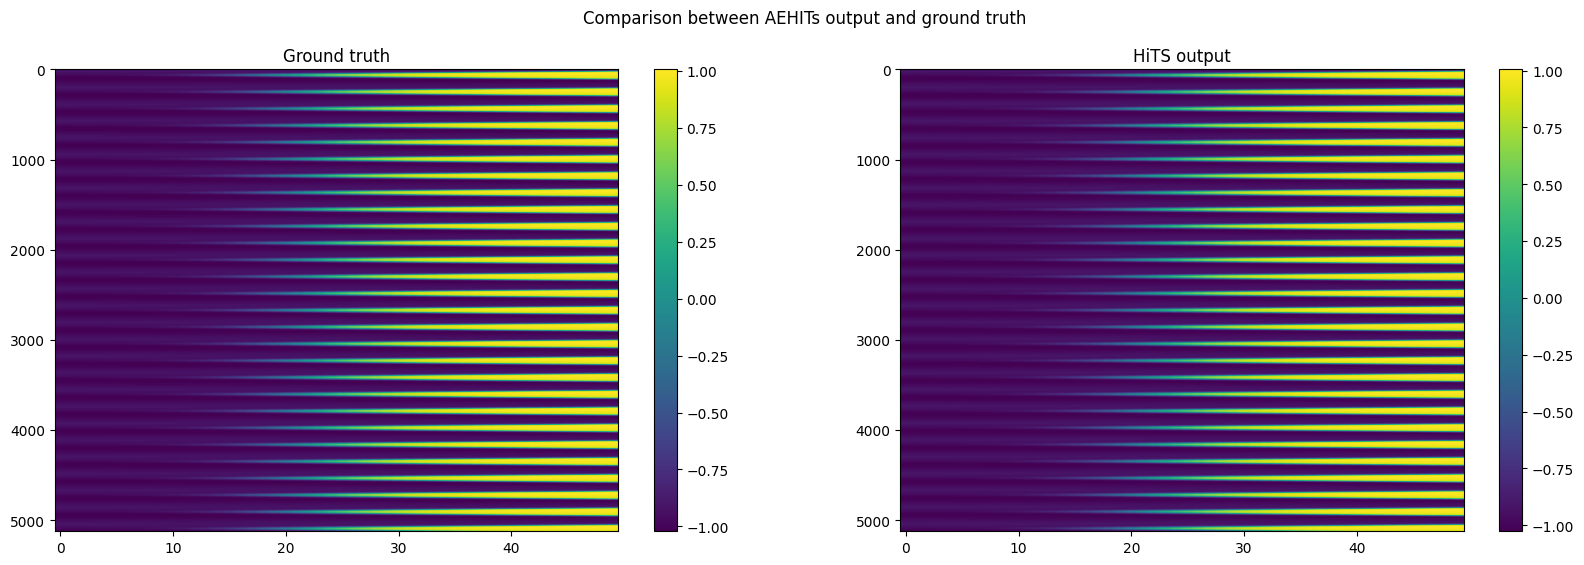

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
# Plot the first subplot
d=101
im1=axs[0].imshow(y1_true, aspect='auto')
axs[0].set_title('Ground truth')

# Plot the second subplot
im2=axs[1].imshow(y1_aehits, aspect='auto')
axs[1].set_title('HiTS output')
# Add a title to the entire figure
fig.suptitle('Comparison between AEHITs output and ground truth')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
# Show the plot
plt.show()

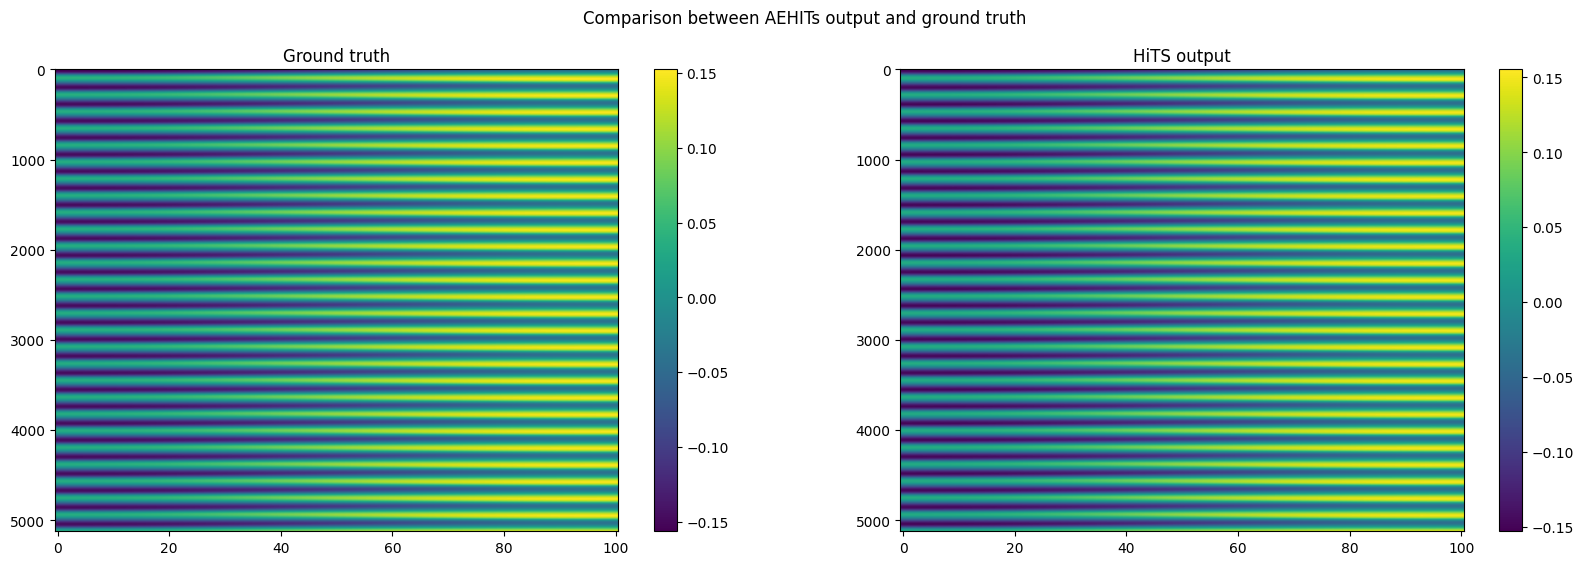

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
# Plot the first subplot
d=101
im1=axs[0].imshow(test_data[0,1:,d:], aspect='auto')
axs[0].set_title('Ground truth')

# Plot the second subplot
im2=axs[1].imshow(y_hits[0,:,d:], aspect='auto')
axs[1].set_title('HiTS output')
# Add a title to the entire figure
fig.suptitle('Comparison between AEHITs output and ground truth')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
# Show the plot
plt.show()

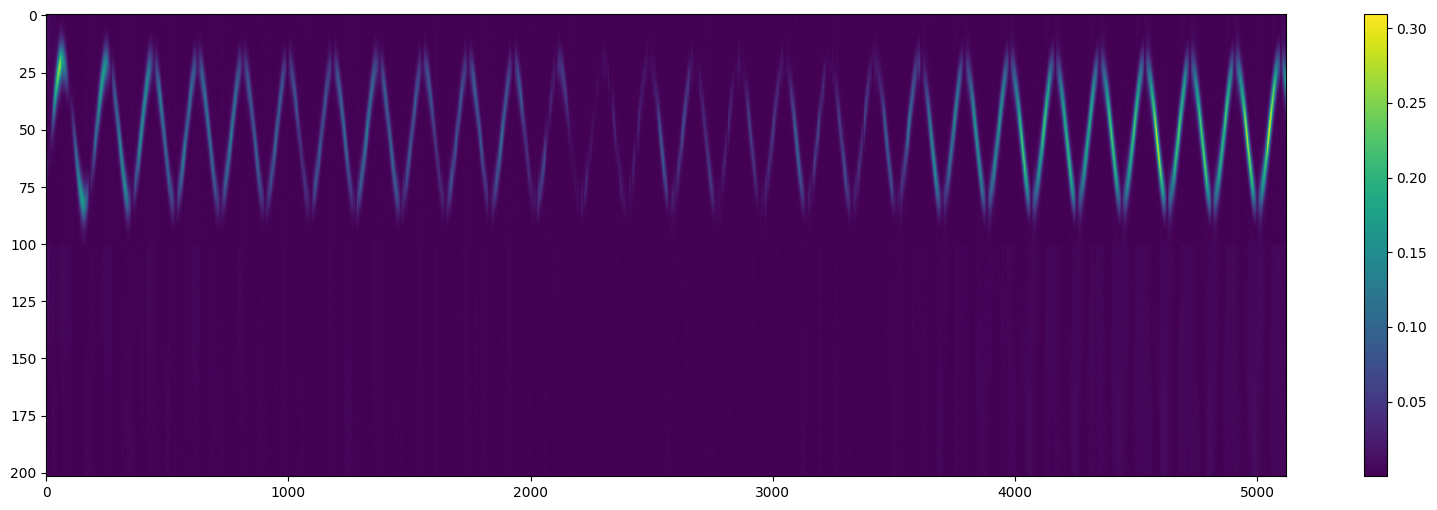

In [44]:
idx=0
fig = plt.figure(figsize=(20, 6))
plt.imshow(np.abs(test_data[idx,1:,:].T-y_hits[idx,:,:].T), aspect='auto')
cbar = plt.colorbar()
plt.show()

### plotting

In [45]:
# import string
# ### Figure pre-requisites
# test_dataT1=FHNresults_1T['test_data'].cpu().detach().numpy()
# y_hitsT1=FHNresults_1T['y_hits'].cpu().detach().numpy()
# labels = 'ABCDEFGHI'
# d=50
# idx=0
# st=100

# y1_true=test_dataT1[idx,st+1:,0]
# y1_aehits=y_hitsT1[idx,st:,0]
# y2_true=test_dataT1[idx,st+1:,d]
# y2_aehits=y_hitsT1[idx,st:,d]

# u_true=test_dataT1[idx,1:,:d]
# u_aehits=y_hitsT1[idx,:,:d]
# v_true=test_dataT1[idx,1:,d:]
# v_aehits=y_hitsT1[idx,:,d:]
# error_u=np.abs(u_true.T-u_aehits.T)
# error_v=np.abs(v_true.T-v_aehits.T)

# #### Figure

# fig, axs = plt.subplots(3, 3, figsize=(10, 10))
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 6, 8, 10]
# #### first plot AE VS PCA
# Xt1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
# labels1=['2','3','4','5','6','7','8','9','10','11','12','13','14','15']
# axs[0, 0].semilogy(AE_loss.T,'*',lw=6,label='AE')
# axs[0, 0].semilogy(PCA_loss,'o',lw=6,label='PCA')
# axs[0, 0].set(xticks=Xt1, xticklabels=labels1)
# # axs[0, 0].set_xticklabels(labels)
# axs[0, 0].set_title('AE vs PCA')
# axs[0, 0].set_xlabel('Latent dimension')
# axs[0, 0].set_ylabel('log (mse)')
# axs[0, 0].legend()
# axs[0, 0].grid()
# axs[0, 0].text(-0.2, 1.1, string.ascii_uppercase[0], transform=axs[0, 0].transAxes,
#                size=20, weight='bold')
# # axs[0, 0].annotate('A', xy=(0.01, 0.085), xycoords='axes fraction', fontsize=16, fontweight='bold')

# ### second
# # Xt2 = np.array([0,1,2,3,4,5,6,7,8,9]) ### FHN
# # labels2=['1','2','3','4','5','6','7','8','9','10']
# # axs[0, 1].semilogy(latent_lstm,'*-',label='lstm')
# # axs[0, 1].semilogy(latent_sindy,'*-',label='SINDY')
# # axs[0, 1].semilogy(latent_RC,'*-',label='RC')
# # axs[0, 1].semilogy(latent_hits,'*-',label='HITS')
# # axs[0, 1].legend(loc=5)
# # axs[0, 1].set(xticks=Xt2, xticklabels=labels2)
# # axs[0, 1].set_xlabel('Testing sets')
# # axs[0, 1].set_ylabel('mse')
# # axs[0, 1].set_title('MSE of various testing conditions')
# # axs[0, 1].grid()
# # axs[0, 1].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axs[0, 1].transAxes,
# #                size=20, weight='bold')
# Xt2 = np.array([0,1,2,3,4])
# labels2=['1','2','3','4','5']
# axs[0, 1].semilogy(latent_lstm,'*-',label='lstm')
# axs[0, 1].semilogy(latent_sindy,'*-',label='SINDY')
# axs[0, 1].semilogy(latent_RC,'*-',label='RC')
# axs[0, 1].semilogy(latent_hits,'*-',label='HiTS')
# axs[0, 1].legend(loc=5)
# axs[0, 1].set(xticks=Xt2, xticklabels=labels2)
# axs[0, 1].set_xlabel('Testing sets')
# axs[0, 1].set_ylabel('mse')
# axs[0, 1].set_title('MSE of various testing conditions')
# axs[0, 1].grid()
# axs[0, 1].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axs[0, 1].transAxes,
#                size=20, weight='bold')
# #### third

# axs[0, 2].plot(y1_true[0::10], y2_true[0::10], linewidth=3,label='true')
# axs[0, 2].plot(y1_aehits[0::10], y2_aehits[0::10], '--',linewidth=3, label='learned')
# axs[0, 2].legend(loc='center')
# axs[0, 2].set_ylabel('u')
# axs[0, 2].set_xlabel('v')
# axs[0, 2].set_title('Phase potrait')
# axs[0, 2].grid('v')
# axs[0, 2].text(-0.2, 1.1, string.ascii_uppercase[2], transform=axs[0, 2].transAxes,
#                size=20, weight='bold')




# #### fourth ploting u part in imshow
# im1=axs[1, 0].imshow(u_true, aspect='auto')
# axs[1, 0].set_title('u true')
# fig.colorbar(im1, ax=axs[1, 0])
# axs[1, 0].text(-0.2, 1.1, string.ascii_uppercase[3], transform=axs[1, 0].transAxes,
#                size=20, weight='bold')


# #### 5th ploting u from aehits part in imshow
# im2=axs[1, 1].imshow(u_aehits, aspect='auto')
# axs[1, 1].set_title('u AEHiTS')
# fig.colorbar(im2, ax=axs[1, 1])
# axs[1, 1].text(-0.2, 1.1, string.ascii_uppercase[4], transform=axs[1, 1].transAxes,
#                size=20, weight='bold')


# #### 6th ploting error 
# im3=axs[1, 2].imshow(error_u, aspect='auto')
# axs[1, 2].set_title('Error U-true vs U-AEHiTS')
# fig.colorbar(im3, ax=axs[1, 2])
# axs[1, 2].text(-0.2, 1.1, string.ascii_uppercase[5], transform=axs[1, 2].transAxes,
#                size=20, weight='bold')

# ########################
# #### 7 ploting v part in imshow
# im4=axs[2, 0].imshow(v_true, aspect='auto')
# axs[2, 0].set_title('v true')
# fig.colorbar(im4, ax=axs[2, 0])
# axs[2, 0].text(-0.2, 1.1, string.ascii_uppercase[6], transform=axs[2, 0].transAxes,
#                size=20, weight='bold')


# #### 8th ploting v from aehits part in imshow
# im5=axs[2, 1].imshow(v_aehits, aspect='auto')
# axs[2, 1].set_title('v AEHiTS')
# fig.colorbar(im5, ax=axs[2, 1])
# axs[2, 1].text(-0.2, 1.1, string.ascii_uppercase[7], transform=axs[2, 1].transAxes,
#                size=20, weight='bold')


# #### 6th ploting error 
# im6=axs[2, 2].imshow(error_v, aspect='auto')
# axs[2, 2].set_title('Error V-true vs V-AEHiTS')
# fig.colorbar(im6, ax=axs[2, 2])
# axs[2, 2].text(-0.2, 1.1,string.ascii_uppercase[8], transform=axs[2, 2].transAxes,
#                size=20, weight='bold')

# # Adjust the spacing between subplots
# plt.tight_layout()

# figname='MainFigureFHN.png'
# # plt.savefig(path_fig+figname, bbox_inches='tight')
# plt.show()


In [25]:
path_fig

'../results/FHN/figure/'

In [47]:
# import matplotlib.pyplot as plt

# # Create a figure and 10 subplots
# fig, axes = plt.subplots(2, 5, figsize=(12, 6))

# # Data for each subplot (you can replace these with your own data)
# data = [ [1, 2, 3, 4, 5],
#          [5, 4, 3, 2, 1],
#          [2, 4, 6, 8, 10],
#          [10, 8, 6, 4, 2],
#          [3, 6, 9, 12, 15],
#          [15, 12, 9, 6, 3],
#          [4, 8, 12, 16, 20],
#          [20, 16, 12, 8, 4],
#          [5, 10, 15, 20, 25],
#          [25, 20, 15, 10, 5] ]

# # Labels to assign to each subplot
# labels = 'ABCDEFGHIJ'

# # Plot each subplot and add the corresponding label
# for i, ax in enumerate(axes.flat):
#     ax.plot(data[i])
#     ax.set_xlabel('X-axis')
#     ax.set_ylabel('Y-axis')

# # Adjust layout and spacing between subplots
# plt.tight_layout()

# # Add annotations outside the figure
# for i, label in enumerate(labels):
#     x_pos = 0.055 + (i % 5) * 0.19
#     y_pos = 0.95 if i < 5 else 0.46
#     fig.text(x_pos, y_pos, label, fontsize=16, fontweight='bold')

# # Show the plots
# plt.show()


In [ ]:
# # Create a figure and subplots
# fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# # Adjust the spacing between subplots
# fig.subplots_adjust(hspace=0.3, wspace=0.3)

# # Generate sample data for plotting
# x = np.linspace(0, 2*np.pi, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# y3 = np.tan(x)

# # Define the variables and labels for each subplot
# variables = [
#     [(mse_latent.T, 'AE'), (S1, 'PCA')],
#     [(y2, 'cos(x)'), (y3, 'tan(x)')],
#     [(y1, 'sin(x)'), (y3, 'tan(x)')]
# ]  # Replace with your actual variables and labels

# for i in range(3):
#     for j in range(3):
#         # Access the subplot using its index
#         ax = axs[i, j]

#         # Plot the variables in the subplot
#         for var, label in variables[i*3+j]:
#             ax.plot(var, label=label)

#         # Customize the subplot
#         ax.set_title(f'Subplot {i*3+j+1}')
#         ax.legend()

# # Display the figure
# plt.show()

### KS equation